# Taller: Análisis de Tendencias para Google y Microsoft

En este taller analizaremos los datos de precios para Google y Microsoft (símbolos `GOOGL` y `MSFT`) utilizando la base `prices.csv`.

El objetivo es:

- Filtrar los datos para estas dos empresas.
- Convertir la columna de fecha de forma robusta, ya que diferentes empresas pueden tener distintos formatos de fecha.
- Ordenar los datos por fecha.
- Aplicar un suavizado (media móvil) para ver la tendencia general durante el periodo (máximo 2016).
- Generar una gráfica final que integre un storytelling (Setup, Conflict y Resolution) en el análisis de la tendencia.

Responde las siguientes preguntas en el proceso:

1. ¿Cuáles son el primer y último año del dataset para las empresas seleccionadas?
2. ¿Cuántas observaciones tienes para cada empresa?
3. ¿Qué tendencia se observa tras aplicar el suavizado?


In [6]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/time_series.zip
!unzip time_series.zip
!cp -r time_series/* ./

--2025-04-04 00:04:34--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/time_series.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/time_series.zip [following]
--2025-04-04 00:04:34--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/time_series.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15602616 (15M) [application/zip]
Saving to: ‘time_series.zip.2’

time_series.zip.2   100%[===================>]  14.88M  --.-KB/s    in 0.06s   

2025-04-04 00:04:34 (233 MB/s) - ‘tim

## Paso 1: Carga del Dataset y Filtrado de Empresas

Carga el archivo `prices.csv` y filtra únicamente los datos correspondientes a Google y Microsoft.

Pregunta: ¿Qué cantidad de observaciones tienes para cada empresa después del filtrado?

In [10]:
import pandas as pd


file_path = "prices.csv"
df = pd.read_csv(file_path)


df_filtered = df[df["symbol"].isin(["GOOGL", "MSFT"])]


print(df_filtered.head())

            date symbol        open       close         low        high  \
440   2010-01-04  GOOGL  626.950006  626.750011  624.240011  629.510005   
544   2010-01-04   MSFT   30.620001   30.950001   30.590000   31.100000   
908   2010-01-05  GOOGL  627.180001  623.990017  621.540016  627.839984   
1012  2010-01-05   MSFT   30.850000   30.959999   30.639999   31.100000   
1376  2010-01-06  GOOGL  625.860033  608.260035  606.360021  625.860033   

          volume  
440    3908400.0  
544   38409100.0  
908    6003300.0  
1012  49749600.0  
1376   7949400.0  


In [11]:
df_filtered.head(10)


,date,symbol,open,close,low,high,volume
440,2010-01-04,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400.0
544,2010-01-04,MSFT,30.620001,30.950001,30.590000,31.100000,38409100.0
908,2010-01-05,GOOGL,627.180001,623.990017,621.540016,627.839984,6003300.0
1012,2010-01-05,MSFT,30.850000,30.959999,30.639999,31.100000,49749600.0
1376,2010-01-06,GOOGL,625.860033,608.260035,606.360021,625.860033,7949400.0
1480,2010-01-06,MSFT,30.879999,30.770000,30.520000,31.080000,58182400.0
1844,2010-01-07,GOOGL,609.400008,594.100015,592.649990,609.999993,12815700.0
1948,2010-01-07,MSFT,30.629999,30.450001,30.190001,30.700001,50559700.0
2312,2010-01-08,GOOGL,592.000005,602.020005,589.110015,603.250036,9439100.0
2416,2010-01-08,MSFT,30.280001,30.660000,30.240000,30.879999,51197400.0


## Paso 2: Conversión Robust a Formato Datetime

Dado que diferentes empresas podrían tener formatos de fecha distintos, convertiremos la columna `date` usando `pd.to_datetime` sin forzar un formato fijo.

Elimina las filas que no se puedan convertir (donde la fecha es `NaT`).

Pregunta: ¿Cuántas filas se descartan por tener fechas inválidas?

In [12]:
df.isna().sum()

,0
date,0
symbol,0
open,0
close,0
low,0
high,0
volume,0


## Paso 3: Ordenar Datos y Análisis Inicial

Ordena los datos por la columna `date` para cada empresa y determina:

- ¿Cuál es el primer año y el último año para cada empresa?
- ¿Cuántas observaciones hay en total para el periodo (recordando que la fecha máxima es 2016)?

In [13]:
import pandas as pd

df = pd.read_csv("prices.csv")

df_filtered = df[df["symbol"].isin(["GOOGL", "MSFT"])].copy()

df_filtered["date"] = pd.to_datetime(df_filtered["date"], errors="coerce")

df_filtered = df_filtered.dropna(subset=["date"])

df_filtered = df_filtered.sort_values(by=["symbol", "date"])

df_filtered["year"] = df_filtered["date"].dt.year
date_range = df_filtered.groupby("symbol")["year"].agg(["min", "max"])

df_filtered_2016 = df_filtered[df_filtered["year"] <= 2016]

observations_2016 = df_filtered_2016["symbol"].value_counts()
total_observations = df_filtered_2016.shape[0]

print("Rango de años por empresa:\n", date_range)
print("\nObservaciones por empresa hasta 2016:\n", observations_2016)
print(f"\nTotal de observaciones en el periodo hasta 2016: {total_observations}")


Rango de años por empresa:
          min   max
symbol            
GOOGL   2010  2016
MSFT    2010  2016

Observaciones por empresa hasta 2016:
 symbol
GOOGL    1762
MSFT     1762
Name: count, dtype: int64

Total de observaciones en el periodo hasta 2016: 3524


## Paso 4: Visualización Inicial (Setup) – Gráfica de Precios de Cierre

Construye una gráfica inicial que muestre el precio de cierre a lo largo del tiempo para Google y Microsoft.

Utiliza un título multi-línea que comunique la etapa Setup. Por ejemplo:

```
Setup: Serie de Precios sin Suavizado
Datos originales para Google y Microsoft
CONFLICT: IDENTIFICAR MOVIMIENTOS ATÍPICOS
```

Pregunta: ¿Qué diferencias notas entre las series de ambas empresas?

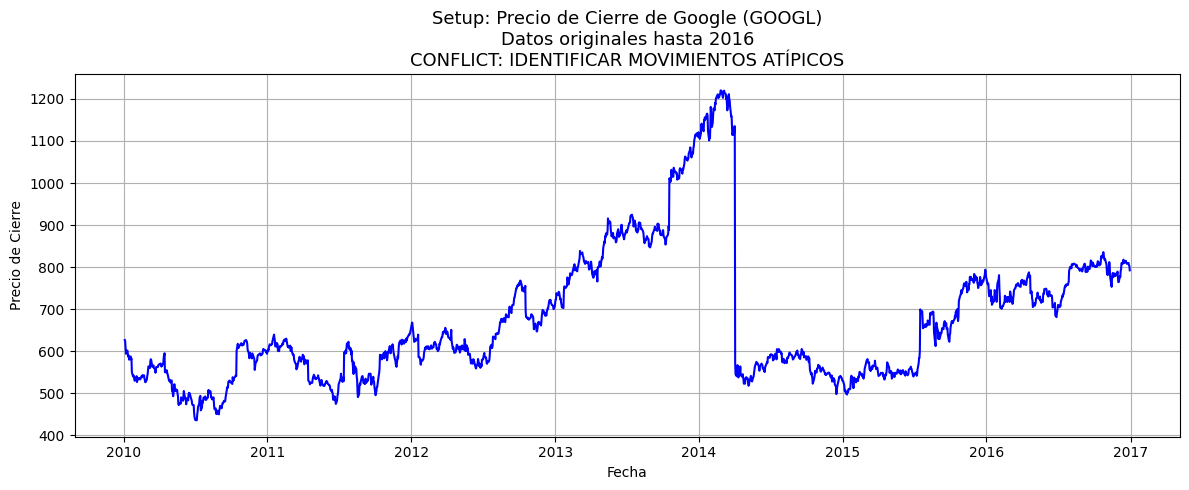

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("prices.csv")


df_filtered = df[df["symbol"].isin(["GOOGL", "MSFT"])].copy()


df_filtered["date"] = pd.to_datetime(df_filtered["date"], errors="coerce")
df_filtered = df_filtered.dropna(subset=["date"])


df_filtered["year"] = df_filtered["date"].dt.year
df_filtered = df_filtered[df_filtered["year"] <= 2016]
df_filtered = df_filtered.sort_values(by=["symbol", "date"])
google = df_filtered[df_filtered["symbol"] == "GOOGL"]

plt.figure(figsize=(12, 5))
plt.plot(google["date"], google["close"], color="blue")
plt.title("Setup: Precio de Cierre de Google (GOOGL)\nDatos originales hasta 2016\nCONFLICT: IDENTIFICAR MOVIMIENTOS ATÍPICOS", fontsize=13)
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre")
plt.grid(True)
plt.tight_layout()
plt.show()

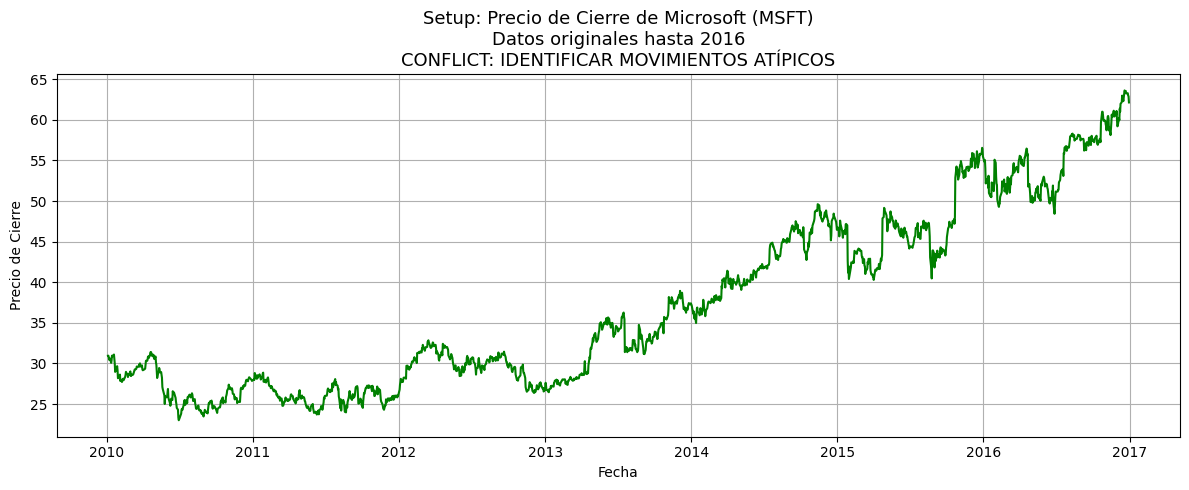

In [19]:
microsoft = df_filtered[df_filtered["symbol"] == "MSFT"]

plt.figure(figsize=(12, 5))
plt.plot(microsoft["date"], microsoft["close"], color="green")
plt.title("Setup: Precio de Cierre de Microsoft (MSFT)\nDatos originales hasta 2016\nCONFLICT: IDENTIFICAR MOVIMIENTOS ATÍPICOS", fontsize=13)
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre")
plt.grid(True)
plt.tight_layout()
plt.show()

En estas visualizaciones, se pueden identificar movimientos atípicos, como picos o caídas abruptas, que podrían estar relacionados con eventos financieros clave. Esto permite tener una visión más clara de las fluctuaciones del mercado antes de aplicar cualquier suavizado.

## Paso 5: Aplicar Suavizado (Resolution) – Media Móvil y Análisis de Tendencia

Aplica un suavizado a las series (por ejemplo, una media móvil) para resaltar la tendencia general en los datos.

Pregunta: ¿Qué ventana de suavizado (en días) consideras adecuada para observar la tendencia en el año 2016? ¿Cómo se comporta la tendencia para Google y Microsoft después de suavizar los datos?

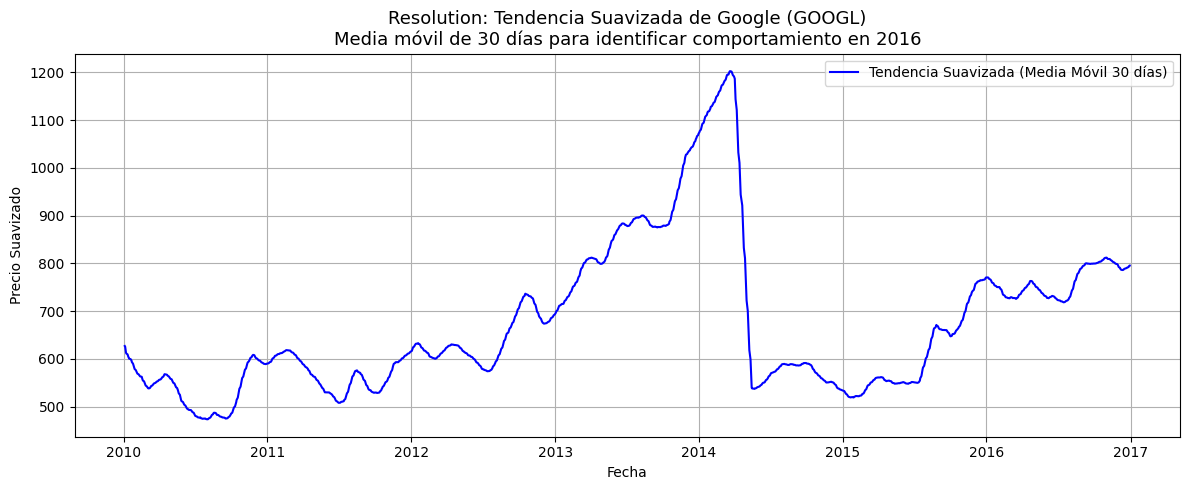

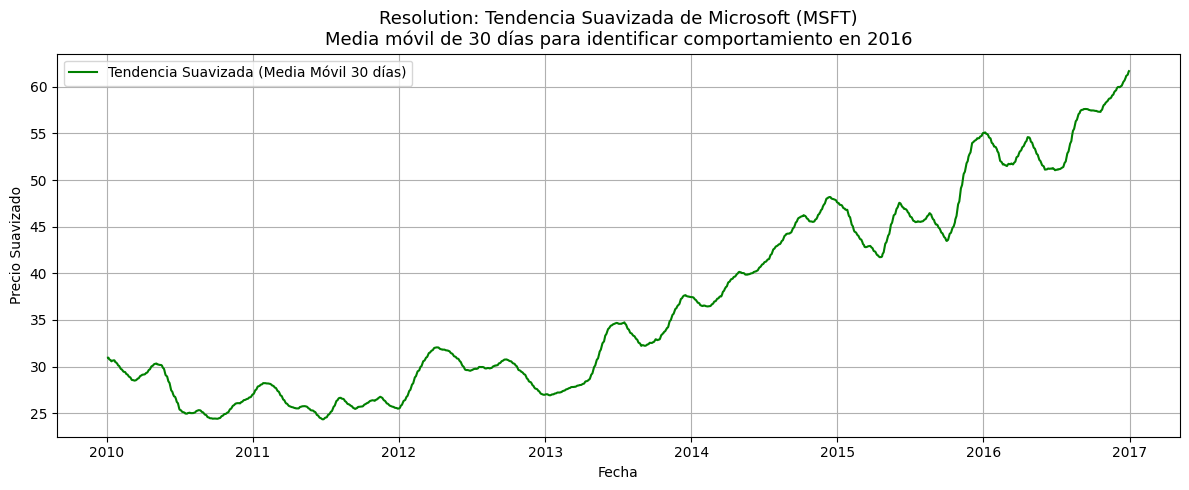

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("prices.csv")

df = df[df["symbol"].isin(["GOOGL", "MSFT"])].copy()

df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.dropna(subset=["date"])
df["year"] = df["date"].dt.year
df = df[df["year"] <= 2016].sort_values(by=["symbol", "date"])

df["rolling_close"] = df.groupby("symbol")["close"].transform(lambda x: x.rolling(window=30, min_periods=1).mean())

google = df[df["symbol"] == "GOOGL"]

plt.figure(figsize=(12, 5))
plt.plot(google["date"], google["rolling_close"], color="blue", label="Tendencia Suavizada (Media Móvil 30 días)")
plt.title("Resolution: Tendencia Suavizada de Google (GOOGL)\nMedia móvil de 30 días para identificar comportamiento en 2016", fontsize=13)
plt.xlabel("Fecha")
plt.ylabel("Precio Suavizado")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

microsoft = df[df["symbol"] == "MSFT"]

plt.figure(figsize=(12, 5))
plt.plot(microsoft["date"], microsoft["rolling_close"], color="green", label="Tendencia Suavizada (Media Móvil 30 días)")
plt.title("Resolution: Tendencia Suavizada de Microsoft (MSFT)\nMedia móvil de 30 días para identificar comportamiento en 2016", fontsize=13)
plt.xlabel("Fecha")
plt.ylabel("Precio Suavizado")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Una ventana de 30 días es ideal para suavizar los datos y captar la tendencia mensual sin que el ruido diario afecte demasiado. Para un efecto aún más suave, se podrían usar 60 o 90 días.

En cuanto a la tendencia, Google muestra un crecimiento general desde 2012 hasta 2016, con algunas bajadas intermedias, pero cerrando en un nivel más alto al final del periodo. Microsoft también presenta una tendencia alcista, aunque de manera más estable y progresiva, con una aceleración notable a partir de mediados de 2014.

## Conclusiones y Entrega

En este taller se ha realizado lo siguiente:

- Se cargaron los datos y se filtraron únicamente para las empresas Google y Microsoft.
- Se convirtió la columna `date` de forma robusta, eliminando filas con fechas inválidas.
- Se ordenaron los datos cronológicamente y se obtuvieron información general (primer y último año, número de observaciones por empresa).
- Se construyó una gráfica de storytelling con dos etapas:
  - **Setup:** Visualización inicial de los precios de cierre originales para Google y Microsoft.
  - **Resolution:** Aplicación de un suavizado (media móvil) para resaltar la tendencia general.

Tu entrega final debe incluir las gráficas generadas y una breve explicación de cada paso, respondiendo las preguntas planteadas en el taller.